<a href="https://colab.research.google.com/github/marianaufcg/Capacitacao/blob/main/guia_de_onda_retangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

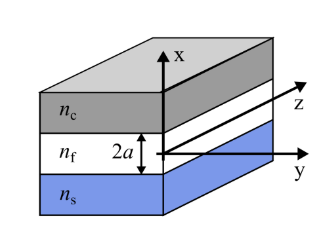

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Propriedades do guia

nc = 1         # Índice de refração da casca
nf = 3.5       # Índice de refração do núcleo
ns = 1.45      # Índice de refração do substrato

micrometros = 1e-6  # Unidade de medida

a = 0.5 * micrometros          # Largura do nucleo = 2a
lamb0 = 1.55 * micrometros     # Comprimento de onda
k0 = 2 * np.pi / lamb0         # Número de onda no vácuo

sigma = (ns**2 - nc**2)/(nf**2 - ns**2) # Parâmetro de assimetria

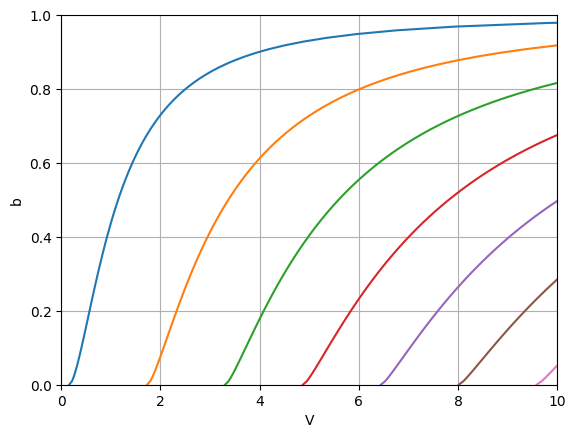

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo V em função de b para cada modo m

def V(m, b):

  aux1 = np.arctan(np.sqrt((b + sigma)/(1 - b)))
  aux2 = np.arctan(np.sqrt(b/(1 - b)))

  return (m*np.pi + aux1 + aux2)/(2*np.sqrt(1-b))

# Cálculo do número de modos

def M(V):

  arctg = np.arctan(np.sqrt(sigma))
  V_max = np.max(V)

  return np.floor((2*V_max - arctg)/(np.pi)) + 1

# Plotagem

b = np.linspace(0, 0.999, 100) # Array de constante de propagação normalizada

v = V(0, b)
M = int(M(v))

for m in range(0, M + 1, 1):

  plt.plot(V(m,b), b)

plt.xlabel("V")
plt.ylabel("b")
plt.xlim(0, 10)
plt.ylim(0,1)
plt.grid(True)

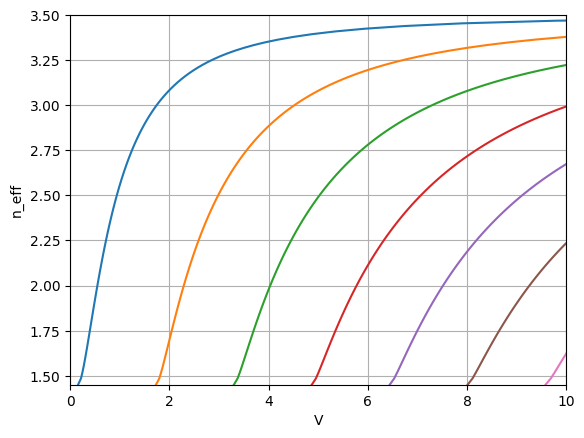

In [50]:
neff = np.sqrt(b*(nf**2 - ns**2) + ns**2)

for m in range(0, M + 1, 1):

  plt.plot(V(m,b), neff)

plt.xlabel("V")
plt.ylabel("n_eff")
plt.xlim(0, 10)
plt.ylim(np.min(neff),3.5)
plt.grid(True)